In [0]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#importing evaluation metrics from sklkearn 
import sklearn.metrics
from sklearn.metrics import r2_score
#importing machine learining models from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour (2).csv


In [0]:
import io
bs = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
# Dataset is now stored in a Pandas Dataframe

## **Data Exploration :**

In [0]:
print(bs.head(2))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  


In [0]:
print(bs.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [0]:
bs.dteday=pd.to_datetime(ts.dteday)
print(bs.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [0]:
print(bs.shape)
#returns the number of observations and features in dataset

(17379, 17)


In [0]:
#checking for missing values
print(bs.isnull().sum())
# Returns the column names along with the number of NaN values in that particular column

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**correlation:**

In [0]:
# droppped the independent variable instant because it is not required for our model building purposes.
cleaned_data=bs.drop("instant",axis=1)
#correlation analysis between the independent variables of data and the variable cnt.
corr=cleaned_data.corr()['cnt']
print(corr)

season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


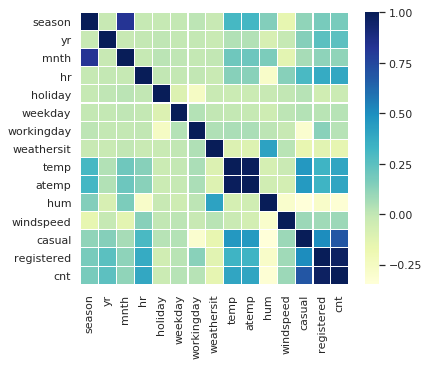

In [0]:
#correlation matrix
corrmat = cleaned_data.corr() 
f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [0]:
#droppped the cnt column from cleaned_data and assigned as predictors
predictors = cleaned_data.drop('cnt',axis=1)

#the target variable(cnt column) is considered as targets
targets = cleaned_data.cnt

#removing columns 
# predictors_without_dateTime = predictors.drop(['dteday',"hr","casual","registered"],axis=1)
predictors_without_dateTime = predictors.drop(['dteday',"hr"],axis=1)


print(predictors_without_dateTime.head())

print(predictors_without_dateTime.shape)

   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   atemp  \
0       1   0     1        0        6           0           1  0.24  0.2879   
1       1   0     1        0        6           0           1  0.22  0.2727   
2       1   0     1        0        6           0           1  0.22  0.2727   
3       1   0     1        0        6           0           1  0.24  0.2879   
4       1   0     1        0        6           0           1  0.24  0.2879   

    hum  windspeed  casual  registered  
0  0.81        0.0       3          13  
1  0.80        0.0       8          32  
2  0.80        0.0       5          27  
3  0.75        0.0       3          10  
4  0.75        0.0       0           1  
(17379, 13)


**multicollinearity check:**

In [0]:
#multicollinearity check
[variance_inflation_factor(predictors_without_dateTime.values,j) for j in range(predictors_without_dateTime.shape[1])]

[21.270514002128305,
 2.0958364098926574,
 15.144056398099279,
 1.0947285164138667,
 3.064160120826148,
 4.1486192679845075,
 7.475887940726503,
 317.8635681061119,
 351.8725777803982,
 13.537553130717349,
 3.1214722631777074,
 3.2337081012214046,
 3.3780816677972636]

In [0]:
#removing columns with highh vif score 
predictors_final = predictors_without_dateTime.drop(["temp","atemp"],axis=1)
print(predictors_final.head(2))

   season  yr  mnth  holiday  weekday  workingday  weathersit   hum  \
0       1   0     1        0        6           0           1  0.81   
1       1   0     1        0        6           0           1  0.80   

   windspeed  casual  registered  
0        0.0       3          13  
1        0.0       8          32  


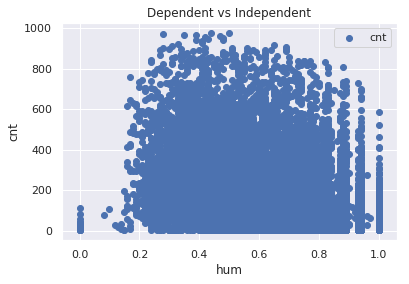

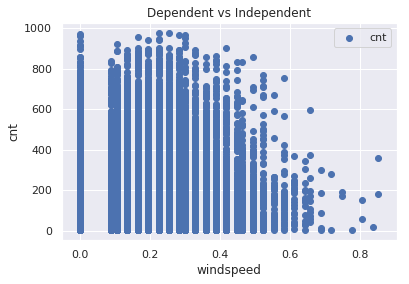

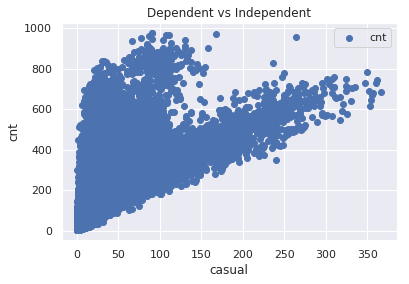

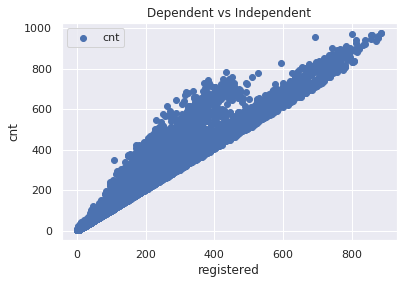

In [0]:
#Visualize the data"
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[6.0,4.0]
indendent=["hum",  "windspeed","casual","registered"]
dependent=["cnt"]
for i in indendent:
  plt.title("Dependent vs Independent")
  plt.xlabel(i)
  plt.ylabel("cnt")
  plt.scatter(predictors_final[i],targets)
  plt.legend()
  plt.show()

**Train-Test Split:**

In [0]:
#splitting the predictors and targets datasets in the ratio of 8:2 using train test split material available in Skylearn library
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors_final, targets, test_size=.2,random_state=42)

#printing the number of observations and features in both training and testing data
print( "Predictor — Training : ", pred_train.shape, "Predictor — Testing : ", pred_test.shape)

Predictor — Training :  (13903, 11) Predictor — Testing :  (3476, 11)


## **Model Building:**

**Linear Regression :**

In [0]:
#linear regression object is created
model = LinearRegression()
#using that object(model) we fit the training and testing into the model linear regression
model.fit(pred_train,tar_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# after fitting the train and test into the model we get the coefficients of independent variables(with minimum cost).
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 1.25988517e-14  4.88498131e-14  9.71445147e-16 -4.36462525e-15
 -1.76540640e-15  2.24958398e-15 -5.06631412e-15 -4.50932694e-14
 -1.54374126e-14  1.00000000e+00  1.00000000e+00]


In [0]:
#printed intercept(CLV value when there is 0 revenue for all six months)
print("Intercept:", model.intercept_)

Intercept: -1.4210854715202004e-13


In [0]:
#now test data is given to the model for prediction 
predictions = model.predict(pred_test)

In [0]:
#function that returns MSE,MAE,RMSE
def meanErrors(tar_test,predictions):
    print("MSE:", sklearn.metrics.mean_squared_error(tar_test, predictions))
    print("MAE:",sklearn.metrics.mean_absolute_error(tar_test, predictions))
    print("RMSE:",np.sqrt(sklearn.metrics.mean_squared_error(tar_test, predictions)))
    
meanErrors(tar_test,predictions)   

MSE: 1.976418215343476e-26
MAE: 1.0442676004061994e-13
RMSE: 1.4058514200808974e-13


In [0]:
#functions that returns r2 and adjusted r2 scores

def r2scoresCalculator(tar_test,predictions,tar_train,pred_train):
    r2=r2_score(tar_test,predictions)
    r3=r2*100
    print("r2 score: %.2f%%"% r3)
    adjustedR2scoreCalculator(r2,tar_train,pred_train)
    return r3

def adjustedR2scoreCalculator(r2,tar_train,pred_train):
    adjusted_r_squared = (1 - (1-r2)*(len(tar_train)-1)/(len(tar_train)-pred_train.shape[1]-1))*100
    print("adjusted r2 score : %.2f%%" % adjusted_r_squared)
    
r2_lr=r2scoresCalculator(tar_test,predictions,tar_train,pred_train)

r2 score: 100.00%
adjusted r2 score : 100.00%


**RandomForestRegressor :**

In [0]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state = 0,max_depth=5)
# Train the model on training data
rf.fit(pred_train,tar_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(pred_test)

In [0]:
meanErrors(tar_test,predictions)

MSE: 236.29245263290815
MAE: 10.523968496813493
RMSE: 15.371807071158164


In [0]:
r2_rfr=r2scoresCalculator(tar_test,predictions,tar_train,pred_train)

r2 score: 99.25%
adjusted r2 score : 99.25%


**KNN Regressor:**

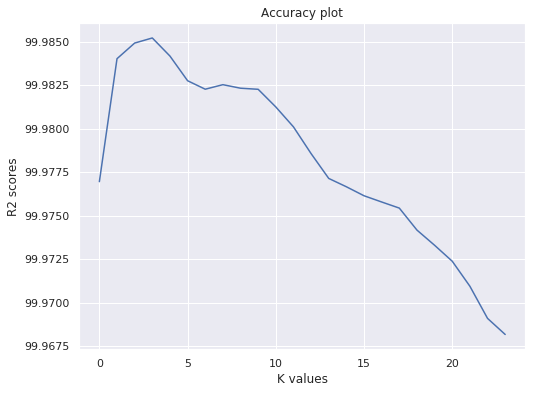

In [0]:
#Selecting the best K value
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[8.0,6.0]
l_acc=[]
k=list(range(1,25))
for i in k:
    knnr= KNeighborsRegressor(metric='euclidean',n_neighbors=i)
    knnr.fit(pred_train,tar_train)
    predictions = knnr.predict(pred_test)
    knn_acc=r2_score(tar_test,predictions)
    l_acc.append(knn_acc*100)

# Generating the y positions.Later, we'll use them to replace them with models.
y_positions = range(len(k))

# Creating our bar plot
plt.plot(y_positions, l_acc)
#models on x,y axis
plt.xlabel('K values')
plt.ylabel('R2 scores')
#title 
plt.title("Accuracy plot")
plt.show()


In [0]:
knnr= KNeighborsRegressor(metric='euclidean',n_neighbors=3)
knnr.fit(pred_train,tar_train)
predictions = knnr.predict(pred_test)

In [0]:
meanErrors(tar_test,predictions)
r2_knnr=r2scoresCalculator(tar_test,predictions,tar_train,pred_train)

MSE: 4.7716084899629205
MAE: 1.2218066743383198
RMSE: 2.184401174226685
r2 score: 99.98%
adjusted r2 score : 99.98%
